---
# Goal : 다음 분기 게임 개발 방향 #
---

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [111]:
url = '/content/vgames2.csv'

In [112]:
data1 = pd.read_csv(url)

#데이터셋 확인
data1.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


---
### (데이터셋 정리)###
---

In [113]:
# 결측치 확인
data1.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [114]:
# 결측치 모두 제거
data1 = data1.dropna()

In [115]:
data1.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [116]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [117]:
# 0 ~ 60 사이 연도는 2000년대로, 60에서 99 사이 연도는 1900년대로 변환
def year_1(x):
  if x < 60:
    x = int(x) + 2000
  elif x >= 60 and x < 1800:
    x = int(x) + 1900
  return int(x)

In [118]:
data1['Year'] = data1['Year'].apply(year_1)

In [119]:
# 단위가 통일되어있지 않아 자의적으로 M은 백만 단위 K는 천 단위 그 외 소숫점 또한 천단위로 판단

def replaceM(x):
  try:
    if 'M' in x:
      x = x.replace('M','')
      return int(float(x) * 1000000)
    elif 'K' in x:
      x = x.replace('K','')
      return int(float(x) * 1000)
    else:
      return int(float(x) * 1000)
  except:
    return x

In [120]:
data1['EU_Sales'] = data1['EU_Sales'].apply(replaceM)
data1['NA_Sales'] = data1['NA_Sales'].apply(replaceM)
data1['JP_Sales'] = data1['JP_Sales'].apply(replaceM)
data1['Other_Sales'] = data1['Other_Sales'].apply(replaceM)

In [121]:
data1 = data1.drop('Unnamed: 0', axis =1)

In [122]:
data1.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170,0,0,10
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120,90,0,40


In [123]:
data1['Total_Sales'] = data1['NA_Sales'] + data1['EU_Sales'] + data1['JP_Sales'] + data1['Other_Sales']

In [124]:
data1.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40,0,0,0,40
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170,0,0,10,180
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20,0,20
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40,0,0,0,40
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120,90,0,40,250


---

In [125]:
# 지역에 따른 장르 선호도
# 연도별 게임 트렌드
# 출고량이 높은 게임 분석

In [126]:
# 플랫폼 별 출하량
# 장르에 따른 연도별 발매 수
# 시장의 크기

---
## 1.장르의 트랜드 ##
---

In [128]:
# 각 연도마다 발매되었던 장르별 갯수
data3_1 = pd.crosstab(data3['Year'],data3['Genre'])

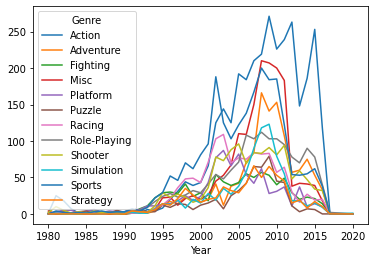

In [129]:
data3_1.plot();

In [130]:
# chi2 검정을 통해 연도와 발매 장르 간의 연관성 분석
stats.chi2_contingency(data3_1)[1]

0.0

In [131]:
# 장르에 따른 연도별 출고량 변화
data3_2 = pd.DataFrame([data1['Genre'],data1['Year'],data1['Total_Sales']]).T
data3_2

,Genre,Year,Total_Sales
0,Action,2008,40
1,Action,2009,180
2,Adventure,2010,20
3,Misc,2010,40
4,Platform,2010,250
...,...,...,...
16593,Platform,2006,200
16594,Action,2005,10
16595,Sports,2015,790
16596,Action,2013,380


In [132]:
data3_3 = pd.crosstab(index = data3_2['Year'],columns = data3_2['Genre'], values = data3_2['Total_Sales'],aggfunc=np.mean)

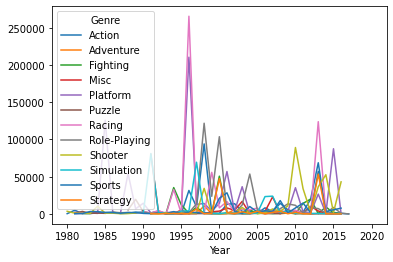

In [133]:
# 연도에 따른 각 장르별 평균 출고량
data3_3.plot();

In [134]:
data3_3 = data3_3.fillna(0)

In [135]:
# chi2 검정을 통해 장르와 각 연도별 출고량 연관성 분석
stats.chi2_contingency(data3_3)[1]

0.0

---
## 2.장르와 출고량의 관계 ##
---

In [147]:
data5 = pd.DataFrame([data1['Genre'], data1['Total_Sales']]).T
data5

,Genre,Total_Sales
0,Action,40
1,Action,180
2,Adventure,20
3,Misc,40
4,Platform,250
...,...,...
16593,Platform,200
16594,Action,10
16595,Sports,790
16596,Action,380


In [148]:
data5_1 = round(data5.groupby(['Genre']).mean(),2)
data5_1 =data5_1.sort_values(['Total_Sales'], ascending = False)

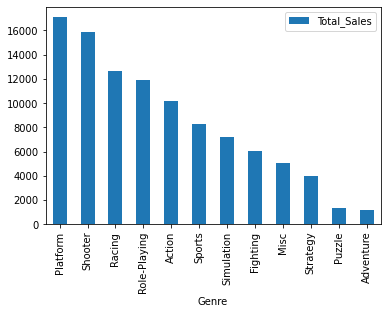

In [149]:
# 장르별 평균 출고량
data5_1.plot(kind='bar');

In [150]:
data5_2 = data1.loc[data1['Year'] >= 2010]
data5_2 = pd.DataFrame([data5_2['Genre'], data5_2['Total_Sales']]).T

In [151]:
data5_3 = round(data5_2.groupby(['Genre']).mean(),2)
data5_3 =data5_3.sort_values(['Total_Sales'], ascending = False)

In [152]:
data5_3.to_csv('bar3.csv')

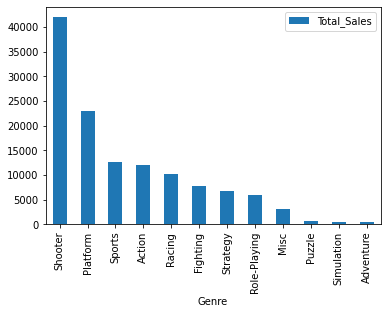

In [153]:
# 2010년 이후 장르별 평균 출고량
data5_3.plot(kind = "bar");

---
## 3.지역에 따른 장르 선호도##
---

In [136]:
# 2010년 이후의 데이터로 진행
data2 = data1.loc[data1['Year'] >= 2010]

In [137]:
data2_1 = pd.DataFrame([data2['Genre'],data2['NA_Sales'],data2['EU_Sales'],data2['JP_Sales'],data2['Other_Sales']]).T

In [138]:
data2_1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2,Adventure,0,0,20,0
3,Misc,40,0,0,0
4,Platform,120,90,0,40
6,Simulation,20,10,0,0
9,Action,40,30,0,10
...,...,...,...,...,...
16581,Action,130,120,0,20
16588,Shooter,70,80,0,30
16590,Adventure,0,0,50,0
16595,Sports,440,190,30,130


In [139]:
data2_2 = data2_1.groupby(data2_1['Genre']).sum().T

In [140]:
data2_2['Total_Genre'] = data2_2['Action'] + data2_2['Adventure'] + data2_2['Fighting'] + data2_2['Misc'] + data2_2['Platform'] + data2_2['Puzzle'] + data2_2['Racing'] + data2_2['Role-Playing'] + data2_2['Shooter'] + data2_2['Simulation'] + data2_2['Sports'] + data2_2['Strategy']

In [141]:
# 장르별 지역 출고량을 백분율로 변환
for i in data2_2.columns:
  data2_2[i] = round((data2_2[i] / data2_2['Total_Genre']) * 100, 2)

data2_3 = data2_2.drop(['Total_Genre'],axis = 1).T
data2_3

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,37.01,24.70,23.62,12.05
Adventure,0.12,0.60,2.31,0.17
Fighting,3.19,0.61,11.77,0.24
Misc,1.91,6.18,0.66,4.04
Platform,3.72,10.49,14.28,4.93
Puzzle,0.03,0.38,0.10,0.34
Racing,5.90,0.37,0.20,9.97
Role-Playing,2.03,1.54,44.34,27.48
Shooter,34.03,32.26,1.64,12.55


In [142]:
data2_3.to_csv('pie.csv')

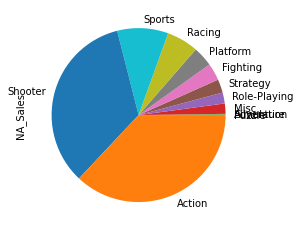

In [143]:
# 북미 장르별 출고량 비율
data2_4 = data2_3.sort_values(['NA_Sales']).T
data2_4.loc['NA_Sales'].plot(kind = 'pie');

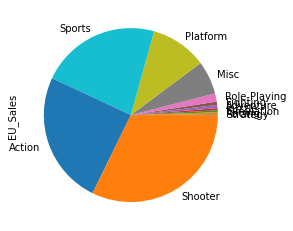

In [144]:
# 유럽 장르별 출고량 비율
data2_5 = data2_3.sort_values(['EU_Sales']).T
data2_5.loc['EU_Sales'].plot(kind = 'pie');

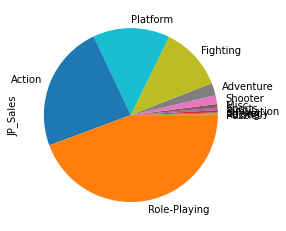

In [145]:
# 일본 장르별 출고량 비율
data2_6 = data2_3.sort_values(['JP_Sales']).T
data2_6.loc['JP_Sales'].plot(kind = 'pie');

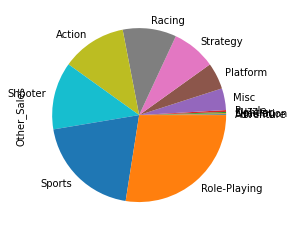

In [146]:
# 그 외 장르별 출고량 비율
data2_7 = data2_3.sort_values(['Other_Sales']).T
data2_7.loc['Other_Sales'].plot(kind = 'pie');

In [127]:
data3 = pd.DataFrame([data1['Year'],data1['Genre']]).T
data3

,Year,Genre
0,2008,Action
1,2009,Action
2,2010,Adventure
3,2010,Misc
4,2010,Platform
...,...,...
16593,2006,Platform
16594,2005,Action
16595,2015,Sports
16596,2013,Action


---
## 4.플랫폼과 출고량의 관계##
---

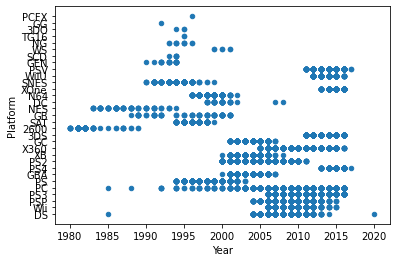

In [154]:
# 연도별 플랫폼 이용량 
data1.plot(kind = 'scatter', x = 'Year', y = 'Platform');

In [155]:
data6 = data1.loc[data1['Year'] > 2009]

In [156]:
# 2010년 이후 연도별 플랫폼 이용량
pd.crosstab(data6['Year'],data6['Platform'])

Platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Year,,,,,,,,,,,,
2010,0,326,87,36,181,0,188,0,253,0,182,0
2011,116,152,137,7,216,0,139,18,143,0,205,0
2012,93,23,61,0,147,0,105,53,32,32,106,0
2013,90,9,38,0,127,16,54,63,12,42,75,19
2014,78,1,44,0,108,75,10,102,6,31,64,61
2015,86,0,50,0,73,136,3,113,4,28,40,78
2016,35,0,38,0,32,107,0,58,0,10,8,54
2017,0,0,0,0,0,1,0,2,0,0,0,0
2020,0,1,0,0,0,0,0,0,0,0,0,0


In [157]:
data6_1 = pd.DataFrame([data6['Platform'], data6['Total_Sales']]).T

In [158]:
data6_2 = round(data6_1.groupby(['Platform']).mean(),2)
data6_2 =data6_2.sort_values(['Total_Sales'], ascending = False)

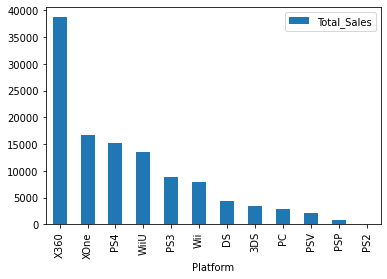

In [159]:
# 2010년 이후 플랫폼별 평균 출고량
data6_2.plot(kind = 'bar');

---
## 5.출고량이 높은 게임에 대한 분석##
---

In [160]:
# 2010년 이후 기준 데이터로 작성
data4 = data1.loc[data1['Year'] >= 2010]

In [161]:
data4_1 = data4.sort_values(['Total_Sales'], ascending = False).head(30)
data4_1.to_csv('bar1')

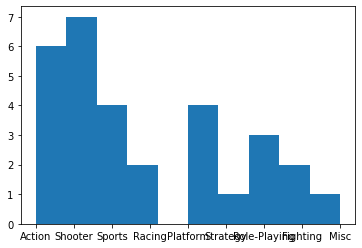

In [162]:
# 출고량 상위 30개 게임의 장르 분포
plt.hist(data4_1['Genre']);

In [163]:
data4_2 = data4.sort_values(['Total_Sales'], ascending = False)
data4_2.head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000,5310,60,1380,9636750
12600,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7030000,1980,80,780,7032840
7865,FIFA 14,X360,2013,Sports,Electronic Arts,920,2930000,10,460,2931390
1629,Assassin's Creed III,PS3,2012,Action,Ubisoft,2640,2560000,160,1140,2563940
8010,Battlefield 3,X360,2011,Shooter,Electronic Arts,4460,2130000,60,690,2135210
9791,Call of Duty: Ghosts,PS4,2013,Shooter,Activision,1780000,1420,50,380,1781850
6929,NBA 2K12,PS3,2011,Sports,Take-Two Interactive,1610000,270,50,180,1610500
15314,Call of Duty: Advanced Warfare,XOne,2014,Shooter,Activision,3210,1530000,10,380,1533600
4010,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1300000,2070,180,650,1302900
5296,Forza Motorsport 5,XOne,2013,Racing,Microsoft Game Studios,1210000,780,10,170,1210960


In [164]:
data4_3 = {'NA_Sales':17,'EU_Sales':8,'JP_Sales':3,'Other_Sales':2}

In [165]:
data4_3 = pd.DataFrame([data4_3])
data4_3.T

,0
NA_Sales,17
EU_Sales,8
JP_Sales,3
Other_Sales,2


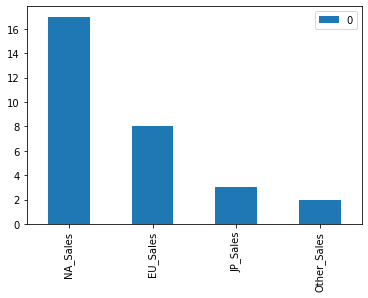

In [166]:
# 출고량 상위 30개 게임 최고출고지역 분포
data4_3.T.plot(kind = 'bar');